In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    root_mean_squared_error,
)
import keras

from pathlib import Path

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15, 8)

In [27]:
df = pd.read_csv(
    "../data/Humidity 2024-11-24 20 28.csv",
    skiprows=3,
    skipfooter=3,
    engine="python",
)
df

,Unnamed: 0,result,table,_start,_stop,_time,_value,_field,_measurement
0,NaN,NaN,0,2024-10-25T12:27:47.243733509Z,2024-11-24T12:27:47.243733509Z,2024-10-25T12:28:00Z,NaN,humidity,first
1,NaN,NaN,0,2024-10-25T12:27:47.243733509Z,2024-11-24T12:27:47.243733509Z,2024-10-25T12:29:00Z,NaN,humidity,first
2,NaN,NaN,0,2024-10-25T12:27:47.243733509Z,2024-11-24T12:27:47.243733509Z,2024-10-25T12:30:00Z,NaN,humidity,first
3,NaN,NaN,0,2024-10-25T12:27:47.243733509Z,2024-11-24T12:27:47.243733509Z,2024-10-25T12:31:00Z,NaN,humidity,first
4,NaN,NaN,0,2024-10-25T12:27:47.243733509Z,2024-11-24T12:27:47.243733509Z,2024-10-25T12:32:00Z,NaN,humidity,first
...,...,...,...,...,...,...,...,...,...
43194,NaN,NaN,0,2024-10-25T12:27:47.243733509Z,2024-11-24T12:27:47.243733509Z,2024-11-24T12:22:00Z,94.445714,humidity,first
43195,NaN,NaN,0,2024-10-25T12:27:47.243733509Z,2024-11-24T12:27:47.243733509Z,2024-11-24T12:23:00Z,94.582857,humidity,first
43196,NaN,NaN,0,2024-10-25T12:27:47.243733509Z,2024-11-24T12:27:47.243733509Z,2024-11-24T12:24:00Z,94.561111,humidity,first
43197,NaN,NaN,0,2024-10-25T12:27:47.243733509Z,2024-11-24T12:27:47.243733509Z,2024-11-24T12:25:00Z,94.331429,humidity,first


In [28]:
df = df[["_time", "_value"]]
df

,_time,_value
0,2024-10-25T12:28:00Z,NaN
1,2024-10-25T12:29:00Z,NaN
2,2024-10-25T12:30:00Z,NaN
3,2024-10-25T12:31:00Z,NaN
4,2024-10-25T12:32:00Z,NaN
...,...,...
43194,2024-11-24T12:22:00Z,94.445714
43195,2024-11-24T12:23:00Z,94.582857
43196,2024-11-24T12:24:00Z,94.561111
43197,2024-11-24T12:25:00Z,94.331429


In [29]:
df = df.rename(columns={"_time": "datetime", "_value": "humidity"})
df

,datetime,humidity
0,2024-10-25T12:28:00Z,NaN
1,2024-10-25T12:29:00Z,NaN
2,2024-10-25T12:30:00Z,NaN
3,2024-10-25T12:31:00Z,NaN
4,2024-10-25T12:32:00Z,NaN
...,...,...
43194,2024-11-24T12:22:00Z,94.445714
43195,2024-11-24T12:23:00Z,94.582857
43196,2024-11-24T12:24:00Z,94.561111
43197,2024-11-24T12:25:00Z,94.331429


In [30]:
df["datetime"] = pd.to_datetime(df["datetime"])
df

,datetime,humidity
0,2024-10-25 12:28:00+00:00,NaN
1,2024-10-25 12:29:00+00:00,NaN
2,2024-10-25 12:30:00+00:00,NaN
3,2024-10-25 12:31:00+00:00,NaN
4,2024-10-25 12:32:00+00:00,NaN
...,...,...
43194,2024-11-24 12:22:00+00:00,94.445714
43195,2024-11-24 12:23:00+00:00,94.582857
43196,2024-11-24 12:24:00+00:00,94.561111
43197,2024-11-24 12:25:00+00:00,94.331429


In [31]:
df = df.set_index("datetime").asfreq("1min")
df

,humidity
datetime,
2024-10-25 12:28:00+00:00,NaN
2024-10-25 12:29:00+00:00,NaN
2024-10-25 12:30:00+00:00,NaN
2024-10-25 12:31:00+00:00,NaN
2024-10-25 12:32:00+00:00,NaN
...,...
2024-11-24 12:22:00+00:00,94.445714
2024-11-24 12:23:00+00:00,94.582857
2024-11-24 12:24:00+00:00,94.561111


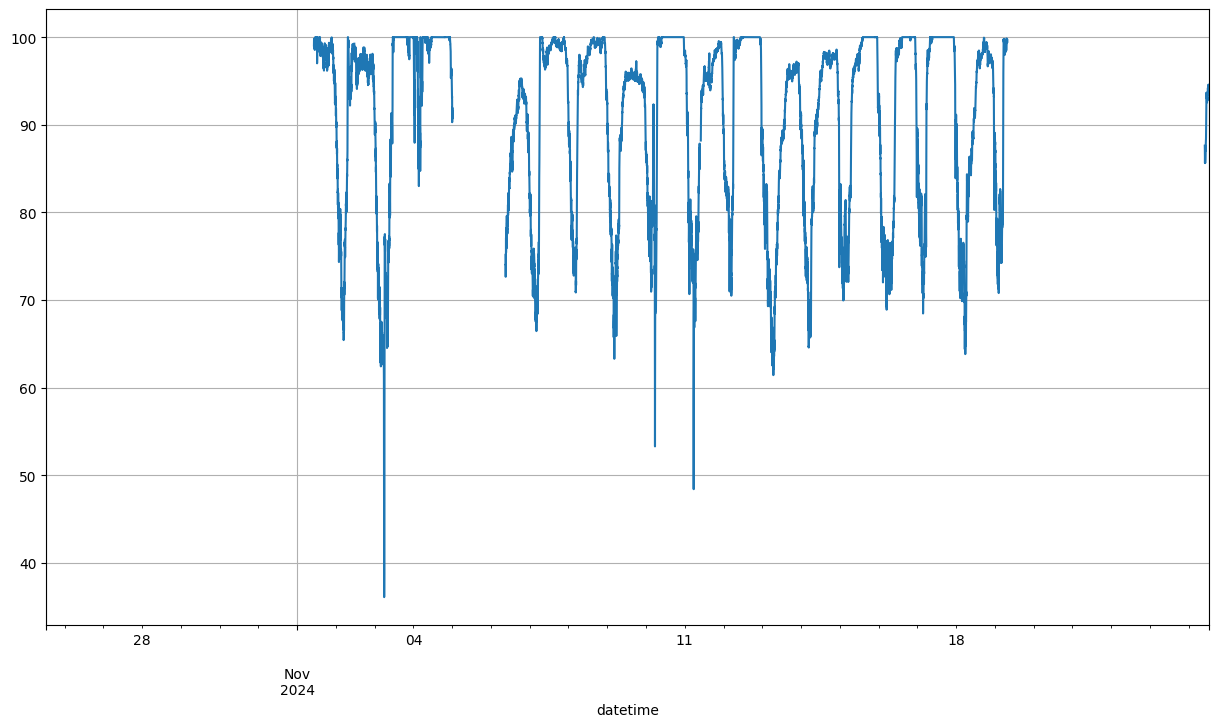

In [32]:
fig, ax = plt.subplots()
df["humidity"].plot(ax=ax)
plt.grid()
plt.show()

In [33]:
df = df.loc[df.index >= "2024-11-01 10:21"]
df = df.loc[df.index <= "2024-11-19 07:45"]
df

,humidity
datetime,
2024-11-01 10:21:00+00:00,99.050000
2024-11-01 10:22:00+00:00,99.294444
2024-11-01 10:23:00+00:00,99.525714
2024-11-01 10:24:00+00:00,99.622857
2024-11-01 10:25:00+00:00,99.145714
...,...
2024-11-19 07:41:00+00:00,99.600000
2024-11-19 07:42:00+00:00,99.748571
2024-11-19 07:43:00+00:00,99.680000


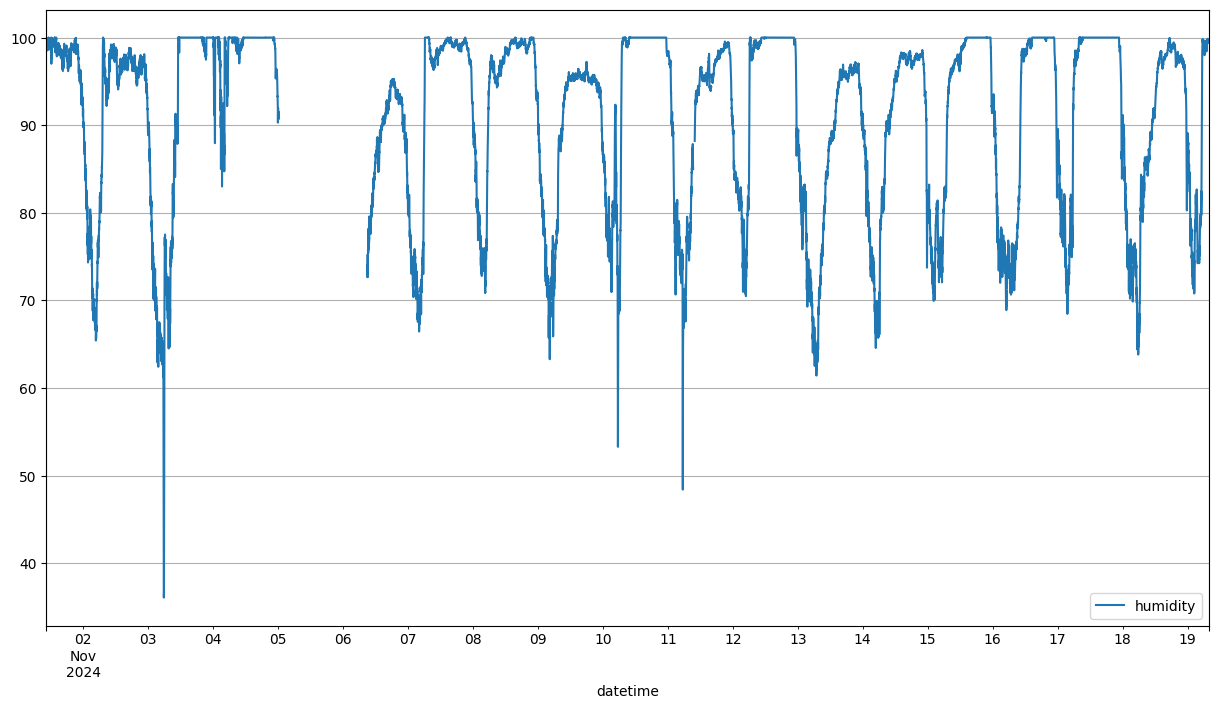

In [34]:
fig, ax = plt.subplots()
df.plot(ax=ax)
plt.grid()
plt.show()

In [35]:
df = df.round({"humidity": 2})
df

,humidity
datetime,
2024-11-01 10:21:00+00:00,99.05
2024-11-01 10:22:00+00:00,99.29
2024-11-01 10:23:00+00:00,99.53
2024-11-01 10:24:00+00:00,99.62
2024-11-01 10:25:00+00:00,99.15
...,...
2024-11-19 07:41:00+00:00,99.60
2024-11-19 07:42:00+00:00,99.75
2024-11-19 07:43:00+00:00,99.68


<Axes: ylabel='humidity'>

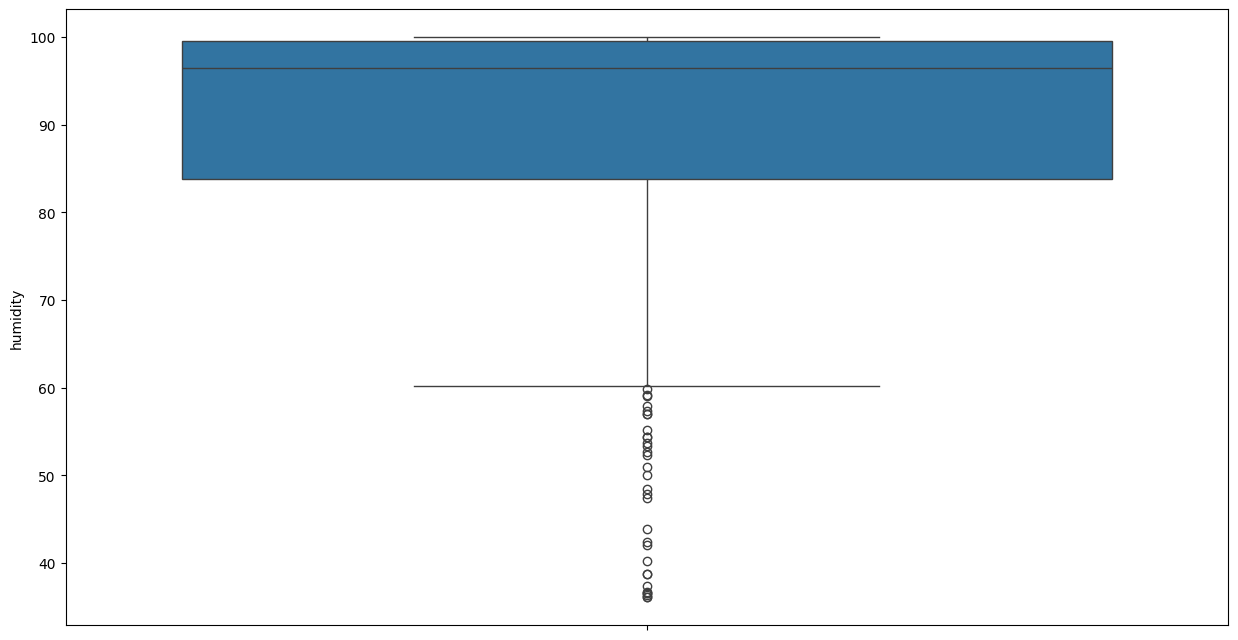

In [36]:
sns.boxplot(data=df, y="humidity")

In [37]:
q1, q3 = df["humidity"].quantile(0.25), df["humidity"].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [38]:
df["humidity"].loc[df["humidity"] > upper_limit] = upper_limit
df["humidity"].loc[df["humidity"] < lower_limit] = lower_limit

<Axes: ylabel='humidity'>

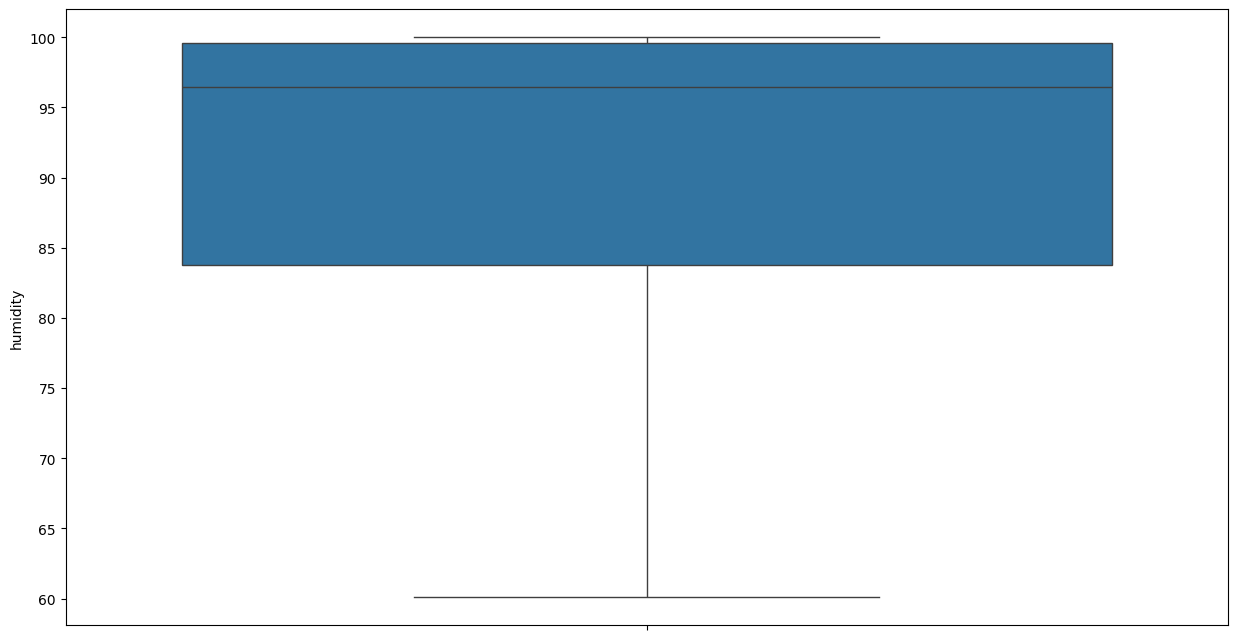

In [39]:
sns.boxplot(df, y="humidity")

In [40]:
print(f"Number data NaN\t: {df.isna().sum()}")

Number data NaN	: humidity    2025
dtype: int64


In [41]:
df_fillna = df.interpolate()
df_fillna.isna().sum()

humidity    0
dtype: int64

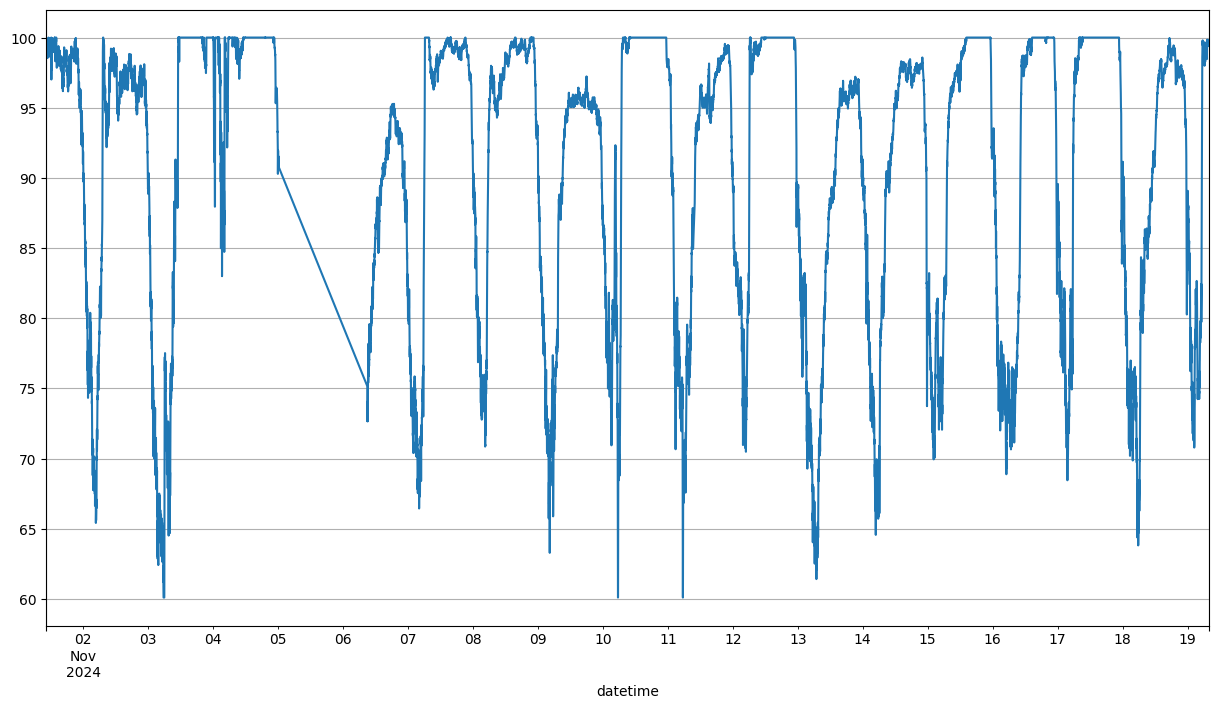

In [42]:
fig, ax = plt.subplots()
df_fillna["humidity"].plot(ax=ax)
plt.grid()
plt.show()

In [43]:
train, test = (
    df_fillna.iloc[: int(np.round(df_fillna.shape[0] * 0.7))],
    df_fillna.iloc[int(np.round(df_fillna.shape[0] * 0.7)) :],
)
train.shape, test.shape

((18036, 1), (7729, 1))

In [44]:
scaler = StandardScaler()
scaler.fit(df_fillna)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)
train_scaled.shape, test.shape

((18036, 1), (7729, 1))

In [45]:
def create_features(dataset, n_past=60, n_future=1):
    X, y = list(), list()

    for i in range(n_past, len(dataset) - n_future + 1):
        X.append(dataset[i - n_past : i, 0 : dataset.shape[1]])
        y.append(dataset[i + n_future - 1 : i + n_future, 0])

    return np.array(X), np.array(y)


X_train, y_train = create_features(train_scaled)
X_test, y_test = create_features(test_scaled)

In [46]:
print(f"X_train shape\t: {X_train.shape}")
print(f"y_train shape\t: {y_train.shape}")

X_train shape	: (17976, 60, 1)
y_train shape	: (17976, 1)


In [47]:
model = keras.Sequential(name="LSTM")
model.add(keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(
    keras.layers.LSTM(
        64, activation=keras.activations.relu, return_sequences=True, name="lstm_1"
    )
)
model.add(
    keras.layers.LSTM(
        32, activation=keras.activations.relu, return_sequences=False, name="lstm_2"
    )
)
model.add(keras.layers.Dropout(0.2, name="dropout"))
model.add(keras.layers.Dense(y_train.shape[1], name="dense"))

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanAbsoluteError(),
    metrics=[
        keras.metrics.MeanAbsoluteError(),
        keras.metrics.MeanAbsolutePercentageError(),
        keras.metrics.RootMeanSquaredError(),
    ],
)

In [48]:
model.summary()

Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode="auto", baseline=None, restore_best_weights=False, start_from_epoch=50)

In [50]:
history = model.fit(
    X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1, callbacks=[earlyStopping]
)

Epoch 1/500
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 56.4997 - root_mean_squared_error: 0.3806 - val_loss: 0.0742 - val_mean_absolute_error: 0.0742 - val_mean_absolute_percentage_error: 14.0739 - val_root_mean_squared_error: 0.1094
Epoch 2/500
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 37.2513 - root_mean_squared_error: 0.1881 - val_loss: 0.0550 - val_mean_absolute_error: 0.0550 - val_mean_absolute_percentage_error: 10.6142 - val_root_mean_squared_error: 0.0757
Epoch 3/500
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 31.1765 - root_mean_squared_error: 0.1783 - val_loss: 0.0546 - val_mean_absolute_error: 0.0546 - val_mean_absolute_percentage_error: 9.1888 - val_root_mean_squared_error: 0.0949
Epoch 4/500
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.1

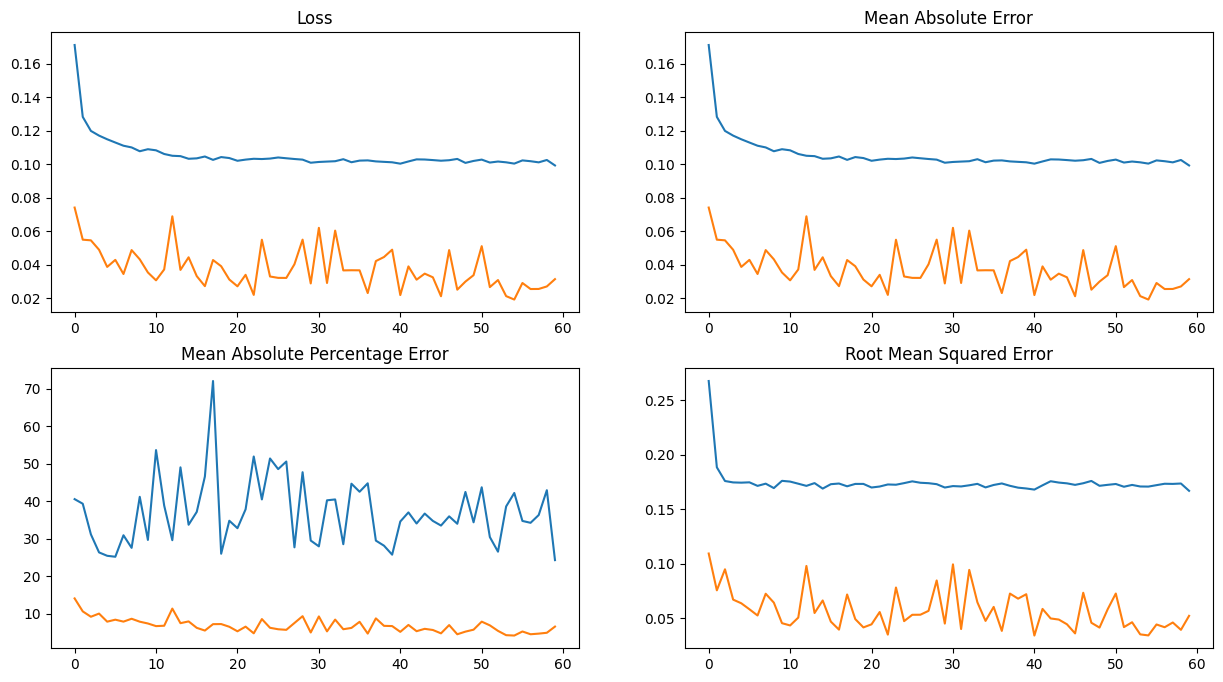

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].plot(history.history['loss'])
ax[0][0].plot(history.history['val_loss'])
ax[0][0].set_title('Loss')
ax[0][1].plot(history.history['mean_absolute_error'])
ax[0][1].plot(history.history['val_mean_absolute_error'])
ax[0][1].set_title('Mean Absolute Error')
ax[1][0].plot(history.history['mean_absolute_percentage_error'])
ax[1][0].plot(history.history['val_mean_absolute_percentage_error'])
ax[1][0].set_title('Mean Absolute Percentage Error')
ax[1][1].plot(history.history['root_mean_squared_error'])
ax[1][1].plot(history.history['val_root_mean_squared_error'])
ax[1][1].set_title('Root Mean Squared Error')
plt.show()

In [52]:
pred = model.predict(X_test)
pred

240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[-4.6684802e-02],
       [-1.4036000e-02],
       [ 8.8229775e-04],
       ...,
       [ 8.8686860e-01],
       [ 8.6887276e-01],
       [ 8.6318058e-01]], dtype=float32)

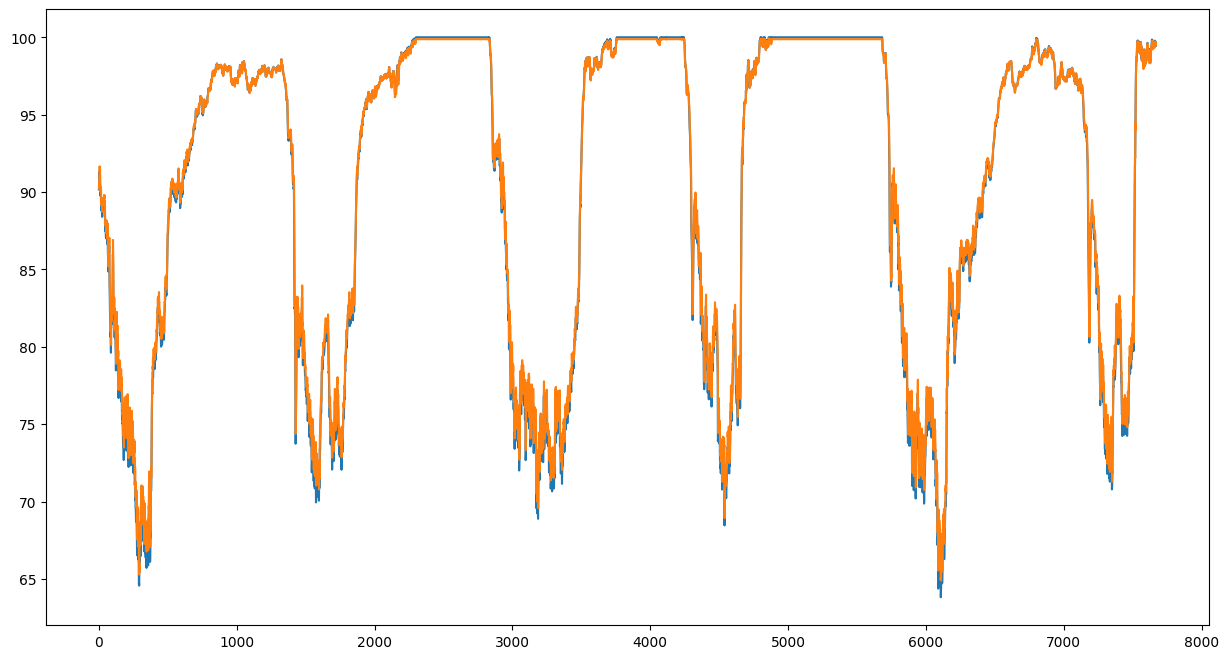

In [53]:
fig, ax = plt.subplots()
ax.plot(scaler.inverse_transform(y_test))
ax.plot(scaler.inverse_transform(pred))
plt.show()

In [54]:
mae = mean_absolute_error(scaler.inverse_transform(y_test), scaler.inverse_transform(pred))
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), scaler.inverse_transform(pred))
rmse = root_mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(pred))

print(f'''
mae\t: {mae}
mape\t: {mape}
rmse\t: {rmse}
''')


mae	: 0.3604874160432518
mape	: 0.004496996744923023
rmse	: 0.5848054147116979

